<a href="https://colab.research.google.com/github/Dr-Isam-ALJAWARNEH/ds-project-gmms-for-airq/blob/Notebook/GMMsforAirQ_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler

### Data

In [56]:
Data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_AQ.csv')
GeoJsonFile = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')

In [7]:
Data.head()

SensorID        time   latitude  longitude  bin0  bin1  bin2  bin3  \
0  NYCP2_CS01A  1631277304  40.847672 -73.869316    11     1     1     0   
1  NYCP2_CS01A  1631277308  40.847668 -73.869316    22     4     1     0   
2  NYCP2_CS01A  1631277313  40.847649 -73.869362    40     1     1     0   
3  NYCP2_CS01A  1631277318  40.847649 -73.869362    26     1     0     0   
4  NYCP2_CS01A  1631277323  40.847649 -73.869362    44     4     0     1   

   bin4  bin5  ...  bin17  bin18  bin19  bin20  bin21  bin22  bin23  \
0     0     0  ...      0      0      0      0      0      0      0   
1     0     2  ...      0      0      0      0      0      0      0   
2     0     1  ...      0      0      0      0      0      0      0   
3     0     0  ...      0      0      0      0      0      0      0   
4     0     0  ...      0      0      0      0      0      0      0   

   temperature  humidity      pm25  
0         23.7      57.3  4.508813  
1         23.7      57.8  5.462420  
2         23.7      57.8  5.154881  
3         23.6      57.6  4.508813  
4         23.6      57.5  5.539503  

[5 rows x 31 columns]

#### Converting Unix time to DateTime

In [39]:
Data['time'] = Data['time'].apply(datetime.datetime.fromtimestamp)

In [9]:
Data.head()

SensorID                time   latitude  longitude  bin0  bin1  bin2  \
0  NYCP2_CS01A 2021-09-10 12:35:04  40.847672 -73.869316    11     1     1   
1  NYCP2_CS01A 2021-09-10 12:35:08  40.847668 -73.869316    22     4     1   
2  NYCP2_CS01A 2021-09-10 12:35:13  40.847649 -73.869362    40     1     1   
3  NYCP2_CS01A 2021-09-10 12:35:18  40.847649 -73.869362    26     1     0   
4  NYCP2_CS01A 2021-09-10 12:35:23  40.847649 -73.869362    44     4     0   

   bin3  bin4  bin5  ...  bin17  bin18  bin19  bin20  bin21  bin22  bin23  \
0     0     0     0  ...      0      0      0      0      0      0      0   
1     0     0     2  ...      0      0      0      0      0      0      0   
2     0     0     1  ...      0      0      0      0      0      0      0   
3     0     0     0  ...      0      0      0      0      0      0      0   
4     1     0     0  ...      0      0      0      0      0      0      0   

   temperature  humidity      pm25  
0         23.7      57.3  4.508813  
1         23.7      57.8  5.462420  
2         23.7      57.8  5.154881  
3         23.6      57.6  4.508813  
4         23.6      57.5  5.539503  

[5 rows x 31 columns]

#### Missing values

In [10]:
Data.isnull().sum()

SensorID       0
time           0
latitude       0
longitude      0
bin0           0
bin1           0
bin2           0
bin3           0
bin4           0
bin5           0
bin6           0
bin7           0
bin8           0
bin9           0
bin10          0
bin11          0
bin12          0
bin13          0
bin14          0
bin15          0
bin16          0
bin17          0
bin18          0
bin19          0
bin20          0
bin21          0
bin22          0
bin23          0
temperature    0
humidity       0
pm25           0
dtype: int64

In [40]:
Data.fillna({'bin12':Data['bin12'].mode()[0], 'bin13':Data['bin13'].mode()[0],'bin14':Data['bin14'].mode()[0],'bin19':Data['bin19'].mode()[0],'bin20':Data['bin20'].mode()[0],
             'bin21':Data['bin21'].mode()[0]}, inplace=True)

In [12]:
Data.isnull().sum()

SensorID       0
time           0
latitude       0
longitude      0
bin0           0
bin1           0
bin2           0
bin3           0
bin4           0
bin5           0
bin6           0
bin7           0
bin8           0
bin9           0
bin10          0
bin11          0
bin12          0
bin13          0
bin14          0
bin15          0
bin16          0
bin17          0
bin18          0
bin19          0
bin20          0
bin21          0
bin22          0
bin23          0
temperature    0
humidity       0
pm25           0
dtype: int64

In [13]:
len(Data)

169999

In [14]:
Data.describe()

latitude      longitude           bin0           bin1  \
count  169999.000000  169999.000000  169999.000000  169999.000000   
mean       40.826202     -73.892555      78.485926       8.056747   
std         0.017215       0.019362     148.612154      22.639578   
min        40.711689     -73.934052       0.000000       0.000000   
25%        40.813564     -73.911232      16.000000       1.000000   
50%        40.818981     -73.892303      39.000000       3.000000   
75%        40.845383     -73.870804      92.000000       9.000000   
max        40.904430     -73.820808    6233.000000    2493.000000   

                bin2           bin3           bin4           bin5  \
count  169999.000000  169999.000000  169999.000000  169999.000000   
mean        1.885382       0.551209       0.806628       0.578003   
std         4.616222       1.461197       1.969984       1.535912   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         2.000000       1.000000       1.000000       1.000000   
max       305.000000     106.000000     101.000000      92.000000   

                bin6           bin7  ...          bin17          bin18  \
count  169999.000000  169999.000000  ...  169999.000000  169999.000000   
mean        0.367173       0.139671  ...       0.000247       0.000159   
std         1.020670       0.492856  ...       0.016086       0.012602   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         0.000000       0.000000  ...       0.000000       0.000000   
max        59.000000      23.000000  ...       2.000000       1.000000   

               bin19          bin20          bin21          bin22  \
count  169999.000000  169999.000000  169999.000000  169999.000000   
mean        0.000118       0.000059       0.000065       0.000047   
std         0.010846       0.007669       0.008044       0.006860   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

               bin23    temperature       humidity           pm25  
count  169999.000000  169999.000000  169999.000000  169999.000000  
mean        0.000141      17.432182      56.241018       4.310939  
std         0.012366       6.659859      16.583384       1.794719  
min         0.000000     -37.000000       0.000000       1.568473  
25%         0.000000      12.400000      42.200000       3.162405  
50%         0.000000      18.400000      55.300000       4.251249  
75%         0.000000      22.600000      69.000000       4.786389  
max         2.000000      32.400000     100.000000      12.744419  

[8 rows x 29 columns]

#### Normalizing

In [57]:
#colsToNormalize = ['latitude', 'longitude', 'bin0', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10','bin11','bin12','bin13','bin14','bin15','bin16','bin17','bin18',
                # 'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity', 'pm25']

colsToNormalize = ['latitude', 'longitude', 'pm25']

scaler = MinMaxScaler()
Data_normalized = pd.DataFrame()
Data_normalized[colsToNormalize] = scaler.fit_transform(Data[colsToNormalize])

In [58]:
Data_normalized.head()

latitude  longitude      pm25
0  0.705522   0.571651  0.263095
1  0.705501   0.571651  0.348422
2  0.705403   0.571244  0.320904
3  0.705403   0.571244  0.263095
4  0.705403   0.571244  0.355319

In [17]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [18]:
Data.dtypes

SensorID               object
time           datetime64[ns]
latitude              float64
longitude             float64
bin0                  float64
bin1                  float64
bin2                  float64
bin3                  float64
bin4                  float64
bin5                  float64
bin6                  float64
bin7                  float64
bin8                  float64
bin9                  float64
bin10                 float64
bin11                 float64
bin12                 float64
bin13                 float64
bin14                 float64
bin15                 float64
bin16                 float64
bin17                 float64
bin18                 float64
bin19                 float64
bin20                 float64
bin21                 float64
bin22                 float64
bin23                 float64
temperature           float64
humidity              float64
pm25                  float64
dtype: object

### Visualization

##### Histograms

(array([28115., 40892., 62110., 19484.,  9983.,  3069.,  1421.,  1235.,
         1351.,  2339.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

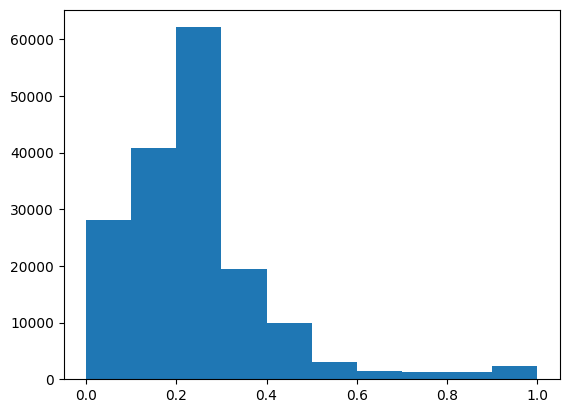

In [ ]:
plt.hist(Data['pm25'])

(array([7.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+01, 1.0000e+00,
        4.9960e+03, 3.3667e+04, 4.8191e+04, 6.3504e+04, 1.9623e+04]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

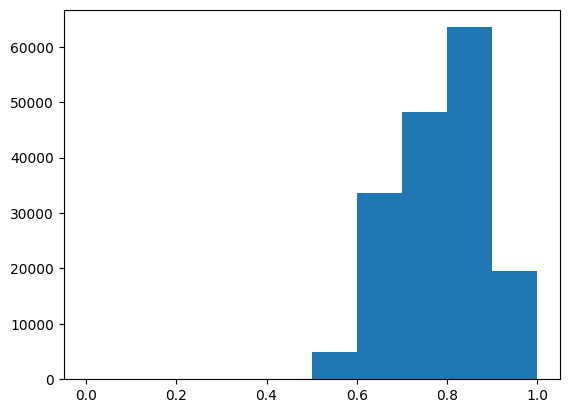

In [ ]:
plt.hist(Data['temperature'])

(array([  108.,     0.,  4153., 29816., 32995., 34140., 28559., 23894.,
        12885.,  3449.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

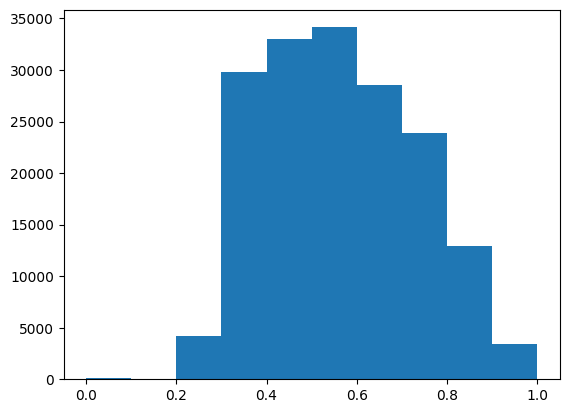

In [ ]:
plt.hist(Data['humidity'])

##### Time Series

###### Humidity vs PM values

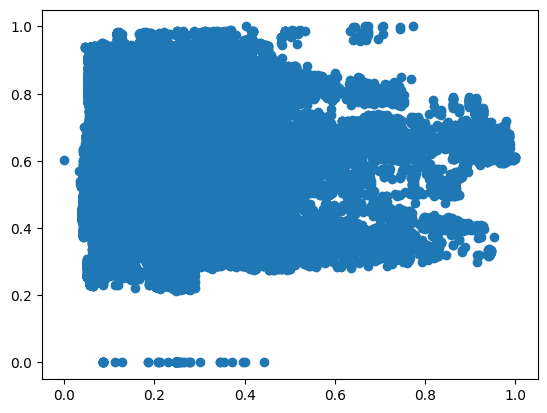

In [ ]:
plt.scatter(Data['pm25'], Data['humidity'])

###### Temperature vs PM values

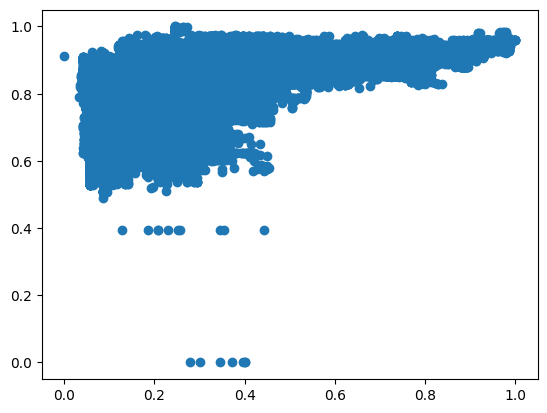

In [ ]:
plt.scatter(Data['pm25'], Data['temperature'])

##### Maps

In [ ]:
import folium
from folium.plugins import HeatMap

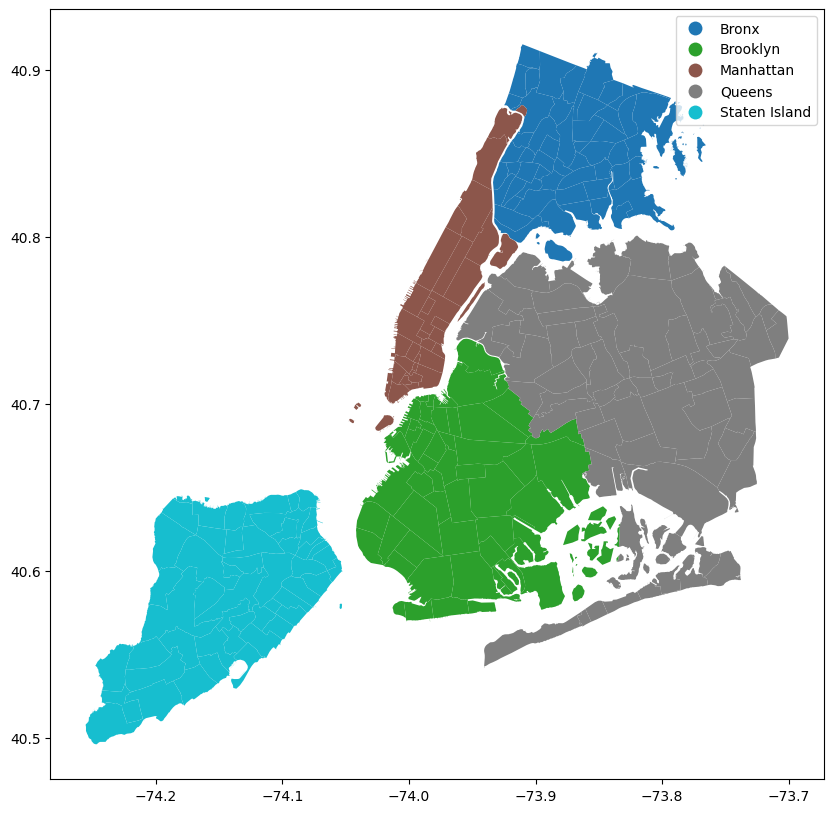

In [ ]:
sMap = GeoJsonFile.plot(column='borough', legend=True, figsize=(10, 10))
# plt.title('NYC Neighborhoods by Borough')
# plt.show()


In [ ]:
from geopandas.tools import sjoin

# Convert air quality data to a GeoDataFrame
gdf_air_quality = gpd.GeoDataFrame(
    Data,
    geometry=gpd.points_from_xy(Data.longitude, Data.latitude)
)

# Perform spatial join
merged_data = sjoin(gdf_air_quality, GeoJsonFile, how='inner', op='within')


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-29-63d2f05b276e>:10: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = sjoin(gdf_air_quality, GeoJsonFile, how='inner', op='within')


In [ ]:
merged_data

SensorID                time   latitude  longitude      bin0  \
0       NYCP2_CS01A 2021-09-10 12:35:04  40.847672 -73.869316  0.001765   
1       NYCP2_CS01A 2021-09-10 12:35:08  40.847668 -73.869316  0.003530   
2       NYCP2_CS01A 2021-09-10 12:35:13  40.847649 -73.869362  0.006417   
3       NYCP2_CS01A 2021-09-10 12:35:18  40.847649 -73.869362  0.004171   
4       NYCP2_CS01A 2021-09-10 12:35:23  40.847649 -73.869362  0.007059   
...             ...                 ...        ...        ...       ...   
161398  NYCP2_CS02A 2021-10-29 18:17:24  40.829147 -73.931694  0.000321   
161454  NYCP2_CS02A 2021-11-11 22:54:17  40.858864 -73.922646  0.000160   
161455  NYCP2_CS02A 2021-11-11 22:54:37  40.854622 -73.923546  0.000160   
161459  NYCP2_CS02A 2021-11-14 01:29:46  40.839794 -73.848595  0.000160   
161461  NYCP2_CS02A 2021-11-14 02:23:19  40.890411 -73.848419  0.000160   

            bin1      bin2      bin3  bin4      bin5  ...  bin23  temperature  \
0       0.000401  0.003279  0.000000   0.0  0.000000  ...    0.0     0.874640   
1       0.001604  0.003279  0.000000   0.0  0.021739  ...    0.0     0.874640   
2       0.000401  0.003279  0.000000   0.0  0.010870  ...    0.0     0.874640   
3       0.000401  0.000000  0.000000   0.0  0.000000  ...    0.0     0.873199   
4       0.001604  0.000000  0.009434   0.0  0.000000  ...    0.0     0.873199   
...          ...       ...       ...   ...       ...  ...    ...          ...   
161398  0.000000  0.000000  0.000000   0.0  0.000000  ...    0.0     0.757925   
161454  0.000000  0.000000  0.000000   0.0  0.000000  ...    0.0     0.768012   
161455  0.000000  0.000000  0.000000   0.0  0.000000  ...    0.0     0.763689   
161459  0.000000  0.000000  0.000000   0.0  0.000000  ...    0.0     0.646974   
161461  0.000000  0.000000  0.000000   0.0  0.000000  ...    0.0     0.632565   

        humidity      pm25                    geometry  index_right  \
0          0.573  0.263095  POINT (-73.86932 40.84767)           38   
1          0.578  0.348422  POINT (-73.86932 40.84767)           38   
2          0.578  0.320904  POINT (-73.86936 40.84765)           38   
3          0.576  0.263095  POINT (-73.86936 40.84765)           38   
4          0.575  0.355319  POINT (-73.86936 40.84765)           38   
...          ...       ...                         ...          ...   
161398     0.637  0.165815  POINT (-73.93169 40.82915)          131   
161454     0.657  0.064764  POINT (-73.92265 40.85886)          141   
161455     0.671  0.071516  POINT (-73.92355 40.85462)          295   
161459     0.560  0.169664  POINT (-73.84860 40.83979)          299   
161461     0.605  0.155817  POINT (-73.84842 40.89041)          294   

              neighborhood  boroughCode    borough  \
0               Bronx Park            2      Bronx   
1               Bronx Park            2      Bronx   
2               Bronx Park            2      Bronx   
3               Bronx Park            2      Bronx   
4               Bronx Park            2      Bronx   
...                    ...          ...        ...   
161398          Highbridge            2      Bronx   
161454              Inwood            1  Manhattan   
161455  Washington Heights            1  Manhattan   
161459  Westchester Square            2      Bronx   
161461           Wakefield            2      Bronx   

                                                      @id  
0       http://nyc.pediacities.com/Resource/Neighborho...  
1       http://nyc.pediacities.com/Resource/Neighborho...  
2       http://nyc.pediacities.com/Resource/Neighborho...  
3       http://nyc.pediacities.com/Resource/Neighborho...  
4       http://nyc.pediacities.com/Resource/Neighborho...  
...                                                   ...  
161398  http://nyc.pediacities.com/Resource/Neighborho...  
161454  http://nyc.pediacities.com/Resource/Neighborho...  
161455  http://nyc.pediacities.com/Resource/Neighborho...  
161459  http://nyc.pediacities.com/

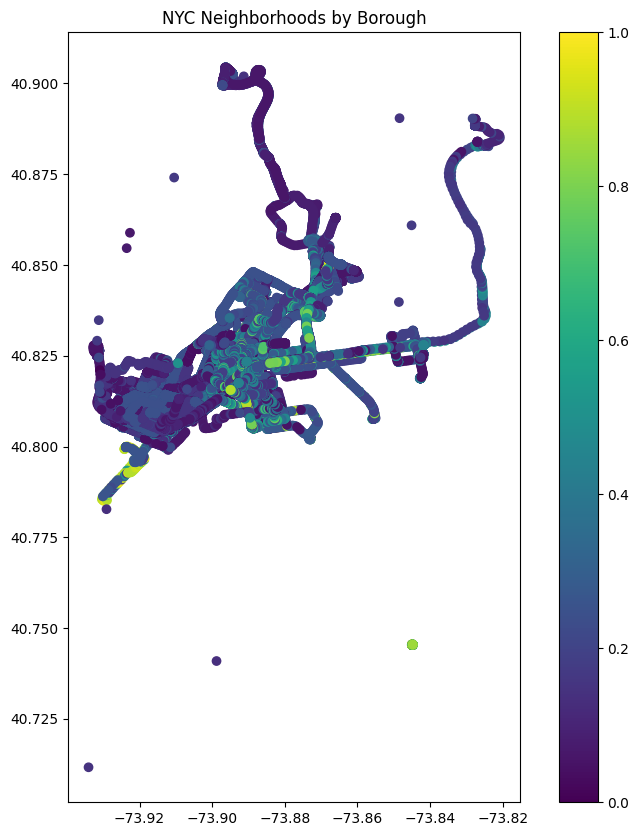

In [ ]:
merged_data.plot(column='pm25', legend=True, figsize=(10, 10))
plt.title('NYC Neighborhoods by Borough')
plt.show()


In [ ]:
average_latitude = merged_data['latitude'].mean()
average_longitude = merged_data['longitude'].mean()

m = folium.Map(location=[average_latitude, average_longitude], zoom_start=11)

In [ ]:
HeatMap(data=merged_data[['latitude', 'longitude', 'pm25']].dropna(), radius=25).add_to(m)

In [ ]:
m

## GMM


Below is a Python script that demonstrates the process  described using Gaussian Mixture Model (GMM) for generating new data:

- Loads the CSV data.
- Scales the data using StandardScaler.
- Performs PCA to reduce the dimensionality while retaining 99% of the variance.
- Determines the optimal number of components for GMM using the Akaike
- Information Criterion (AIC).
- Confirms whether the GMM has converged.
- Generates 100 new samples using the GMM.
- Inverse transforms the PCA to obtain the original features.
- Denormalizes the data.
- Saves the generated data to a new CSV file.
- Prints the generated data.


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_AQ.csv")

In [ ]:
data.dtypes

SensorID        object
time             int64
latitude       float64
longitude      float64
bin0             int64
bin1             int64
bin2             int64
bin3             int64
bin4             int64
bin5             int64
bin6             int64
bin7             int64
bin8             int64
bin9             int64
bin10            int64
bin11            int64
bin12            int64
bin13            int64
bin14            int64
bin15            int64
bin16            int64
bin17            int64
bin18            int64
bin19            int64
bin20            int64
bin21            int64
bin22            int64
bin23            int64
temperature    float64
humidity       float64
pm25           float64
dtype: object

In [3]:
X = data[['longitude', 'latitude', 'pm25']].values

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
type(X_scaled)

numpy.ndarray

In [ ]:
# Perform PCA with 99% variance retention
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
type(X_pca)

numpy.ndarray

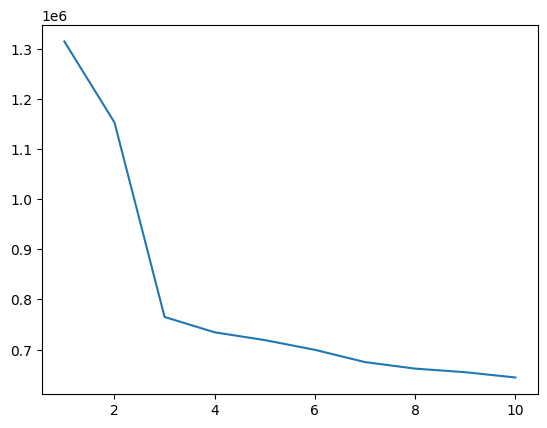

In [ ]:
n_components = np.arange(1, 11, 1)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(X_pca).aic(X_pca) for model in models]
plt.plot(n_components, aics);

In [ ]:
# Determine the number of components using AIC
lowest_aic = np.infty
best_gmm = None
aics = []
for n_components in range(1, 11):
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X_pca)

    aics.append(gmm.aic(X_pca))
    if gmm.aic(X_pca) < lowest_aic:
        lowest_aic = gmm.aic(X_pca)
        print(lowest_aic)
        best_gmm = gmm

# Confirm convergence
if best_gmm.converged_:
    print("GMM has converged.")
else:
    print("GMM has not converged.")

1314744.3686799137
1153172.1019164212
765016.9006014467
728526.0700162554
723501.5523676273
693098.6967959685
679903.3929256594
669497.5348923784
663346.507980117
651514.7394958211
GMM has converged.


In [ ]:
print(n_components)

10


In [ ]:
# Generate new samples
new_samples_pca = best_gmm.sample(n_samples=100)[0]

In [ ]:
# Inverse transform the PCA to get original features
new_samples = pca.inverse_transform(new_samples_pca)

# Denormalize the data
new_samples_denormalized = scaler.inverse_transform(new_samples)

# Create a DataFrame for new samples
new_data = pd.DataFrame(new_samples_denormalized, columns=['longitude', 'latitude', 'pm25'])

In [ ]:
new_data.head(2)

longitude   latitude      pm25
0 -73.895907  40.818229  1.614467
1 -73.888683  40.819228  3.089042

In [ ]:
# Save or use the new data
new_data.to_csv("generated_data.csv", index=False)

# Print the generated data
print("Generated Data:")
print(new_data)


Generated Data:
    longitude   latitude       pm25
0  -73.895907  40.818229   1.614467
1  -73.888683  40.819228   3.089042
2  -73.899465  40.819536   2.381908
3  -73.891942  40.826039   2.906982
4  -73.878924  40.811716   2.595535
..        ...        ...        ...
95 -73.862633  40.872289   5.196297
96 -73.892490  40.837993   9.413438
97 -73.872394  40.858346   9.676488
98 -73.910495  40.836653   9.495386
99 -73.891289  40.872626  10.373679

[100 rows x 3 columns]


In [ ]:

# Measure performance in terms of accuracy
# Calculate statistics for original and generated data
original_stats = data.describe()
generated_stats = new_data.describe()

In [ ]:
# Compare mean, standard deviation, and correlation between original and generated data
mean_diff = abs(original_stats.loc['mean'] - generated_stats.loc['mean'])
std_diff = abs(original_stats.loc['std'] - generated_stats.loc['std'])
correlation = data.corrwith(new_data)

# Print the performance metrics
print("Performance Metrics:")
print("Mean Difference:")
print(mean_diff)
print("Standard Deviation Difference:")
print(std_diff)
print("Correlation:")
print(correlation)

Performance Metrics:
Mean Difference:
bin0                NaN
bin1                NaN
bin10               NaN
bin11               NaN
bin12               NaN
bin13               NaN
bin14               NaN
bin15               NaN
bin16               NaN
bin17               NaN
bin18               NaN
bin19               NaN
bin2                NaN
bin20               NaN
bin21               NaN
bin22               NaN
bin23               NaN
bin3                NaN
bin4                NaN
bin5                NaN
bin6                NaN
bin7                NaN
bin8                NaN
bin9                NaN
humidity            NaN
latitude       0.003388
longitude      0.001120
pm25           0.137186
temperature         NaN
time                NaN
Name: mean, dtype: float64
Standard Deviation Difference:
bin0                NaN
bin1                NaN
bin10               NaN
bin11               NaN
bin12               NaN
bin13               NaN
bin14               NaN
bin15           

<ipython-input-97-91542a01a238>:4: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corrwith(new_data)


In [ ]:
# Step 5: Calculate performance metrics (RMSE and MAPE)
# Assuming we have true values for comparison
true_values = data[['longitude', 'latitude', 'pm25']].values[:100]  # Assuming first 100 rows are true values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(true_values[:, 2], new_samples_denormalized[:, 2]))
# Calculate MAPE
mape = np.mean(np.abs((true_values[:, 2] - new_samples_denormalized[:, 2]) / true_values[:, 2])) * 100

print("RMSE:", rmse)
print("MAPE:", mape)

RMSE: 2.3629594718162497
MAPE: 34.38316000751925


In [ ]:
new_data.head()

longitude   latitude      pm25
0 -73.895907  40.818229  1.614467
1 -73.888683  40.819228  3.089042
2 -73.899465  40.819536  2.381908
3 -73.891942  40.826039  2.906982
4 -73.878924  40.811716  2.595535

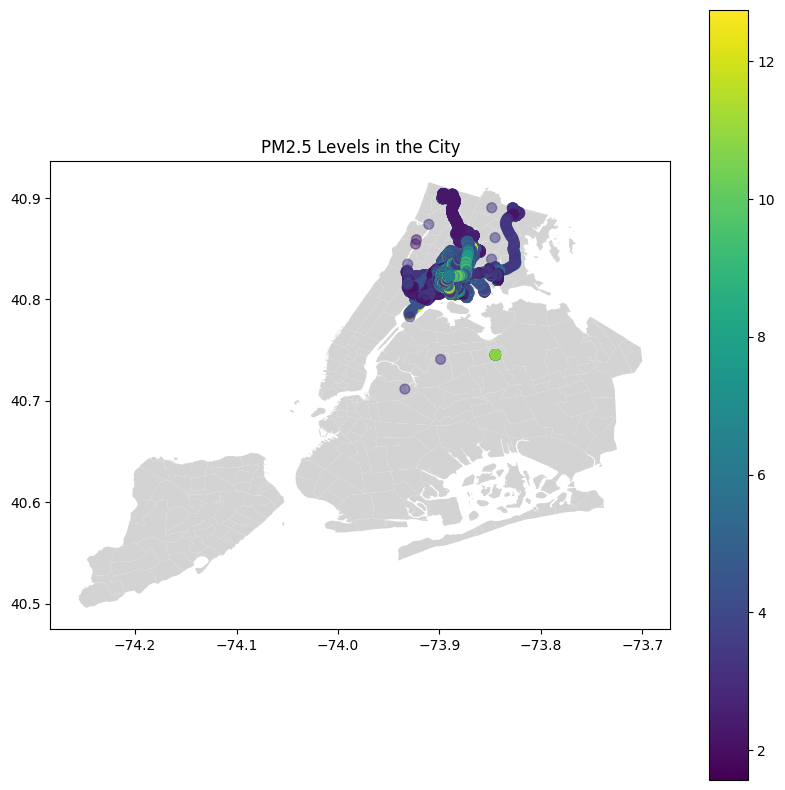

In [ ]:
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

fig, ax = plt.subplots(figsize=(10, 10))

GeoJsonFile.plot(ax=ax, color='lightgrey')

gdf.plot(ax=ax, column='pm25', cmap='viridis', legend=True, markersize=50, alpha=0.5)

plt.title('PM2.5 Levels in the City')
plt.show()

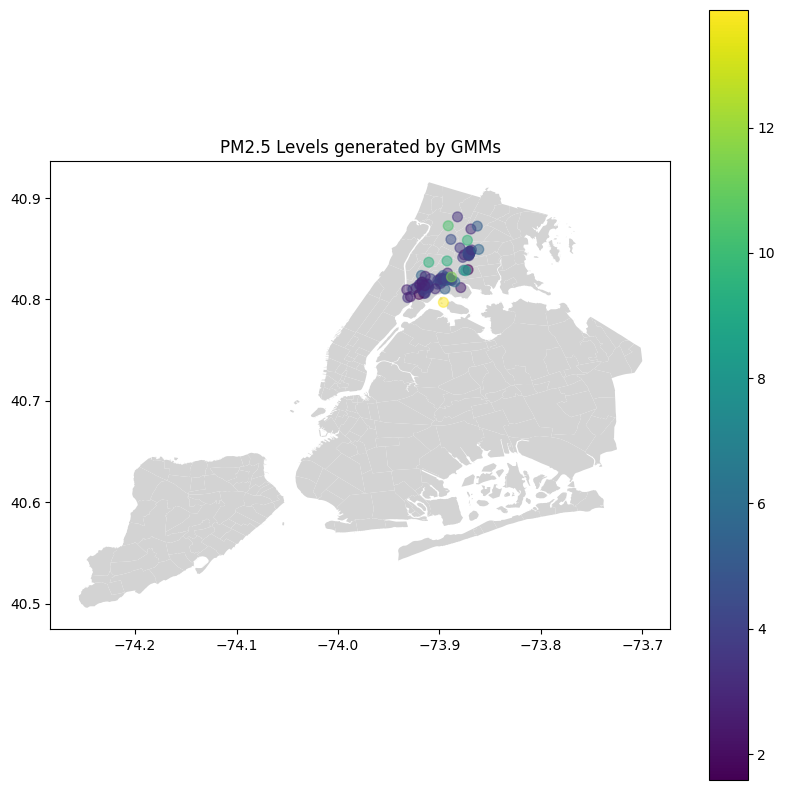

In [ ]:
gdf = gpd.GeoDataFrame(new_data, geometry=gpd.points_from_xy(new_data.longitude, new_data.latitude))

fig, ax = plt.subplots(figsize=(10, 10))

GeoJsonFile.plot(ax=ax, color='lightgrey')

gdf.plot(ax=ax, column='pm25', cmap='viridis', legend=True, markersize=50, alpha=0.5)

plt.title('PM2.5 Levels generated by GMMs')
plt.show()


## KDE

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = data[['longitude', 'latitude', 'pm25']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
from sklearn.neighbors import KernelDensity

# Kernel Density Estimation
kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde.fit(X_pca)


KernelDensity(bandwidth=0.5)

In [ ]:
def kde_resample(kde_model, data, n_samples=100):
    # Generate random indices
    indices = np.random.randint(0, data.shape[0], n_samples)
    # Select random samples as 'seeds'
    seeds = data[indices]
    # Sample from normal distribution around seeds
    new_samples = seeds + np.random.normal(0, kde.bandwidth, seeds.shape)
    return new_samples

new_samples_pca = kde_resample(kde, X_pca, n_samples=100)

In [ ]:
new_samples = pca.inverse_transform(new_samples_pca)

new_samples_denormalized = scaler.inverse_transform(new_samples)

new_data = pd.DataFrame(new_samples_denormalized, columns=['longitude', 'latitude', 'pm25'])


In [ ]:
new_data.to_csv("generated_data_kde.csv", index=False)

print("Generated Data via KDE:")
print(new_data.head())


Generated Data via KDE:
   longitude   latitude      pm25
0 -73.907282  40.888065  5.496648
1 -73.888087  40.821387  3.198289
2 -73.864883  40.836641  4.384786
3 -73.909765  40.799199  3.293871
4 -73.912583  40.820882  3.131615


In [ ]:
from sklearn.metrics import mean_squared_error

true_values = data[['longitude', 'latitude', 'pm25']].values[:100]  # Assuming first 100 rows are true values

rmse = np.sqrt(mean_squared_error(true_values[:, 2], new_samples_denormalized[:, 2]))

mape = np.mean(np.abs((true_values[:, 2] - new_samples_denormalized[:, 2]) / true_values[:, 2])) * 100

print("RMSE:", rmse)
print("MAPE:", mape)


RMSE: 2.2439658339211244
MAPE: 34.63996044589792


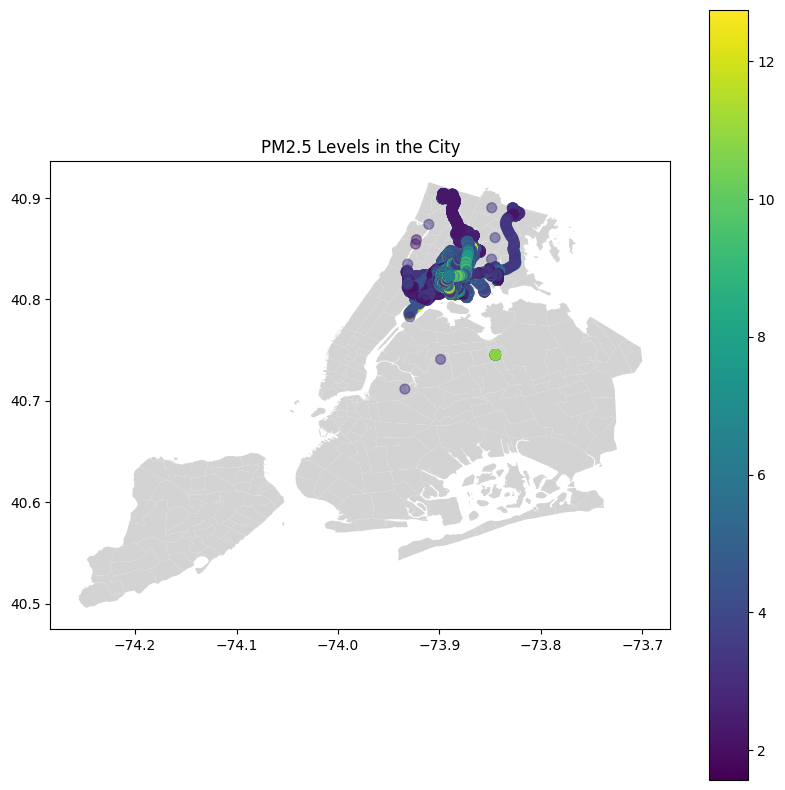

In [ ]:
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoJSON boundaries
GeoJsonFile.plot(ax=ax, color='lightgrey')

# Overlay PM2.5 data points
gdf.plot(ax=ax, column='pm25', cmap='viridis', legend=True, markersize=50, alpha=0.5)

plt.title('PM2.5 Levels in the City')
plt.show()

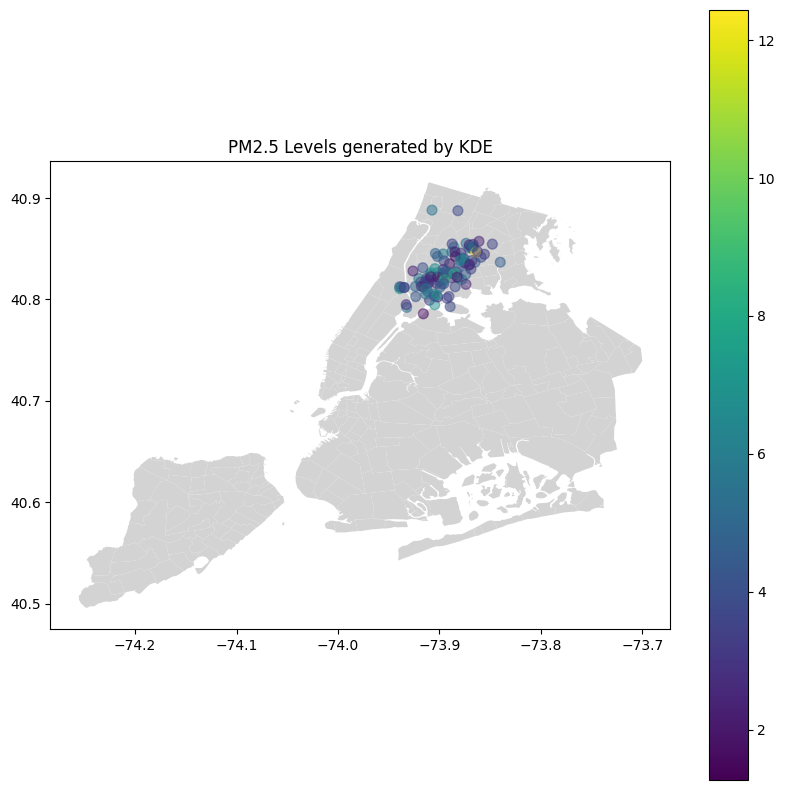

In [ ]:
gdf = gpd.GeoDataFrame(new_data, geometry=gpd.points_from_xy(new_data.longitude, new_data.latitude))

fig, ax = plt.subplots(figsize=(10, 10))

GeoJsonFile.plot(ax=ax, color='lightgrey')

gdf.plot(ax=ax, column='pm25', cmap='viridis', legend=True, markersize=50, alpha=0.5)

plt.title('PM2.5 Levels generated by KDE')
plt.show()


## GANs

### Taking sequential factor into account

In [98]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Reshape
import matplotlib.pyplot as plt

In [ ]:
def sample_real_sequences(real_pm25_data, batch_size):
    indices = np.random.randint(0, len(Data_normalized), size=batch_size)
    return real_pm25_data[indices]

In [ ]:
# synthetic PM2.5 sequences
def generate_pm25_sequences(n_samples):
    # random latent space vectors
    latent_space = np.random.normal(0, 1, size=(n_samples, LATENT_DIM, 1))
    # synthetic PM2.5 sequences using the generator model
    synthetic_sequences = generator.predict(latent_space)
    return synthetic_sequences

real_pm25_data = Data['pm25']

# Train the GAN
def train_gan(epochs, batch_size):
    for epoch in range(epochs):
        # Sample real PM2.5 sequences from dataset
        real_sequences = sample_real_sequences(real_pm25_data, batch_size)

        # Generate synthetic PM2.5 sequences
        synthetic_sequences = generate_pm25_sequences(batch_size)

        # Train the discriminator
        discriminator.train_on_batch(real_sequences, np.ones((batch_size, 1)))
        discriminator.train_on_batch(synthetic_sequences, np.zeros((batch_size, 1)))

        # Train the generator (via the combined GAN model)
        gan.train_on_batch(np.random.normal(0, 1, size=(batch_size, LATENT_DIM, 1)), np.ones((batch_size, 1)))

# Train the GAN
train_gan(epochs=10000, batch_size=32)

# Generate synthetic PM2.5 sequences
synthetic_pm25_sequences = generate_pm25_sequences(1000)

# Plot the distribution of synthetic PM2.5 sequences
plt.hist(synthetic_pm25_sequences.flatten(), bins=30, density=True)
plt.xlabel('PM2.5 Value')
plt.ylabel('Density')
plt.title('Synthetic PM2.5 Sequence Distribution')
plt.show()

### Not taking sequence element into account

In [93]:
real_pm25_data = Data_normalized.values

In [95]:
def sample_real_sequences(real_pm25_data, batch_size):
    # Assuming real_pm25_data is a numpy array or pandas DataFrame containing your real PM2.5 data
    indices = np.random.randint(0, len(real_pm25_data), size=batch_size)
    return real_pm25_data[indices]

In [96]:
# generator
def define_generator(latent_dim, n_outputs):
    model = Sequential([
        Input(shape=(latent_dim,)),
        Dense(128, activation='relu'),
        Dense(256, activation='relu'),
        Dense(n_outputs, activation='linear')  # Adjust output activation for regression
    ])
    model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mae'])  # Use MSE for regression
    return model

# discriminator
def define_discriminator(n_inputs):
    model = Sequential([
        Dense(128, activation='relu', input_dim=n_inputs),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')  # Sigmoid for binary classification
    ])
    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])  # BCE for binary classification
    return model

# combined generator and discriminator model
def define_gan(generator, discriminator):
    # weights in the discriminator not trainable
    discriminator.trainable = False
    model = Sequential([
        generator,
        discriminator
    ])
    model.compile(loss='binary_crossentropy', optimizer=Adam())  # BCE for binary classification
    return model


In [ ]:
# Length of input vector
LENGTH_INPUT = len(real_pm25_data[0])  # based on the dimensionality of data
LATENT_DIM = 50

In [99]:
# discriminator model
discriminator = define_discriminator(LENGTH_INPUT)

# generator model
generator = define_generator(LATENT_DIM, LENGTH_INPUT)

# Define the combined generator and discriminator model
gan = define_gan(generator, discriminator)


In [100]:
# synthetic PM2.5 data
def generate_pm25_samples(n_samples):
    # random latent space vectors
    latent_space = np.random.normal(0, 1, size=(n_samples, LATENT_DIM, 1))
    # synthetic PM2.5 data using the generator model
    synthetic_pm25 = generator.predict(latent_space)
    return synthetic_pm25


In [104]:
# GAN
def train_gan(epochs, batch_size):
    for epoch in range(epochs):
        print('Epoch No: ', epoch)
        # Sample real data batches from dataset
        real_data_batch = sample_real_sequences(real_pm25_data, batch_size)

        # Generate synthetic data batches
        synthetic_data_batch = generate_pm25_samples(batch_size)

        # Train the discriminator
        discriminator.train_on_batch(real_data_batch, np.ones((batch_size, 1)))
        discriminator.train_on_batch(synthetic_data_batch, np.zeros((batch_size, 1)))

        # Train the generator
        gan.train_on_batch(np.random.normal(0, 1, size=(batch_size, LATENT_DIM)), np.ones((batch_size, 1)))
    return real_data_batch

In [ ]:
# Train the GAN
real_data_batch = train_gan(epochs=10, batch_size=100)

# Generate synthetic PM2.5 data
synthetic_pm25 = generate_pm25_samples(100)

# # Plot the distribution of synthetic PM2.5 data
# plt.hist(synthetic_pm25.flatten(), bins=30, density=True)
# plt.xlabel('PM2.5 Value')
# plt.ylabel('Density')
# plt.title('Synthetic PM2.5 Data Distribution')
# plt.show()


In [ ]:
import os
import logging
import numpy as np
import pandas as pd
import tensorflow as tf


In [174]:
class Gan():

    def __init__(self, data):


        self.data = data
        self.n_epochs = 200

    # Genereta random noise in a latent space
    def _noise(self):
        noise = np.random.normal(0, 1, self.data.shape)
        return noise

    def _generator(self):
        model = tf.keras.Sequential(name="Generator_model")
        model.add(tf.keras.layers.Dense(15, activation='relu',
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dense(30, activation='relu'))
        model.add(tf.keras.layers.Dense(
            self.data.shape[1], activation='linear'))
        return model

    def _discriminator(self):
        model = tf.keras.Sequential(name="Discriminator_model")
        model.add(tf.keras.layers.Dense(25, activation='relu',
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dense(50, activation='relu'))
        # sigmoid => real or fake
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        return model

    # define the combined generator and discriminator model,
    # for updating the generator
    def _GAN(self, generator, discriminator):
        discriminator.trainable = False
        generator.trainable = True
        model = tf.keras.Sequential(name="GAN")
        model.add(generator)
        model.add(discriminator)
        model.compile(loss='binary_crossentropy', optimizer='adam')
        return model

    # train the generator and discriminator
    def train(self, generator, discriminator, gan):

        # determine half the size of one batch, for updating the  discriminator
        # manually enumerate epochs
        for epoch in range(self.n_epochs):

            # Train the discriminator
            generated_data = generator.predict(self._noise())
            labels = np.concatenate([np.ones(self.data.shape[0]), np.zeros(self.data.shape[0])])
            X = np.concatenate([self.data, generated_data])
            discriminator.trainable = True
            d_loss , _ = discriminator.train_on_batch(X, labels)

            # Train the generator
            noise = self._noise()
            g_loss = gan.train_on_batch(noise, np.ones(self.data.shape[0]))


            print('>%d, d=%.3f, g=%.3f' %(epoch+1, d_loss, g_loss))

        return generator

In [175]:
model = Gan(data=real_pm25_data)
generator = model._generator()
descriminator = model._discriminator()
gan_model = model._GAN(generator=generator, discriminator=descriminator)
trained_model = model.train(
generator=generator, discriminator=descriminator, gan=gan_model)

5313/5313 [==============================] - 11s 2ms/step
>1, d=0.852, g=0.425
5313/5313 [==============================] - 10s 2ms/step
>2, d=0.842, g=0.426
5313/5313 [==============================] - 10s 2ms/step
>3, d=0.832, g=0.429
5313/5313 [==============================] - 11s 2ms/step
>4, d=0.822, g=0.433
5313/5313 [==============================] - 10s 2ms/step
>5, d=0.809, g=0.438
5313/5313 [==============================] - 9s 2ms/step
>6, d=0.795, g=0.444
5313/5313 [==============================] - 9s 2ms/step
>7, d=0.778, g=0.453
5313/5313 [==============================] - 9s 2ms/step
>8, d=0.761, g=0.463
5313/5313 [==============================] - 9s 2ms/step
>9, d=0.742, g=0.476
5313/5313 [==============================] - 9s 2ms/step
>10, d=0.722, g=0.491
5313/5313 [==============================] - 9s 2ms/step
>11, d=0.700, g=0.509
5313/5313 [==============================] - 11s 2ms/step
>12, d=0.678, g=0.529
5313/5313 [==============================] - 9s 2ms/ste

KeyboardInterrupt: 

In [176]:
noise = np.random.normal(0, 1, real_pm25_data.shape)
new_data = trained_model.predict(noise)

5313/5313 [==============================] - 10s 2ms/step


In [177]:
new_samples_denormalized = scaler.inverse_transform(new_data)
new_data = pd.DataFrame(new_samples_denormalized, columns=['latitude', 'longitude', 'pm25'])

In [178]:
from sklearn.metrics import mean_squared_error

true_values = Data[['latitude', 'longitude', 'pm25']].values  # Assuming first 100 rows are true values

rmse = np.sqrt(mean_squared_error(true_values[:,2], new_samples_denormalized[:,2]))

mape = np.mean(np.abs((true_values[:, 2] - new_samples_denormalized[:, 2]) / true_values[:, 2])) * 100

print("RMSE:", rmse)
print("MAPE:", mape)


RMSE: 7.501596971268601
MAPE: 137.39290467069577


In [179]:
new_data.to_csv("generated_data_gan.csv", index=False)

print("Generated Data via GAN:")
print(new_data.head())

Generated Data via GAN:
    latitude  longitude       pm25
0  40.565571 -74.050583  10.145022
1  40.323349 -73.858704   1.935484
2  40.725601 -73.982880   5.723969
3  40.601437 -74.058281  11.360632
4  40.483826 -73.854332   8.350068


In [180]:
test = data.iloc[:100, :]

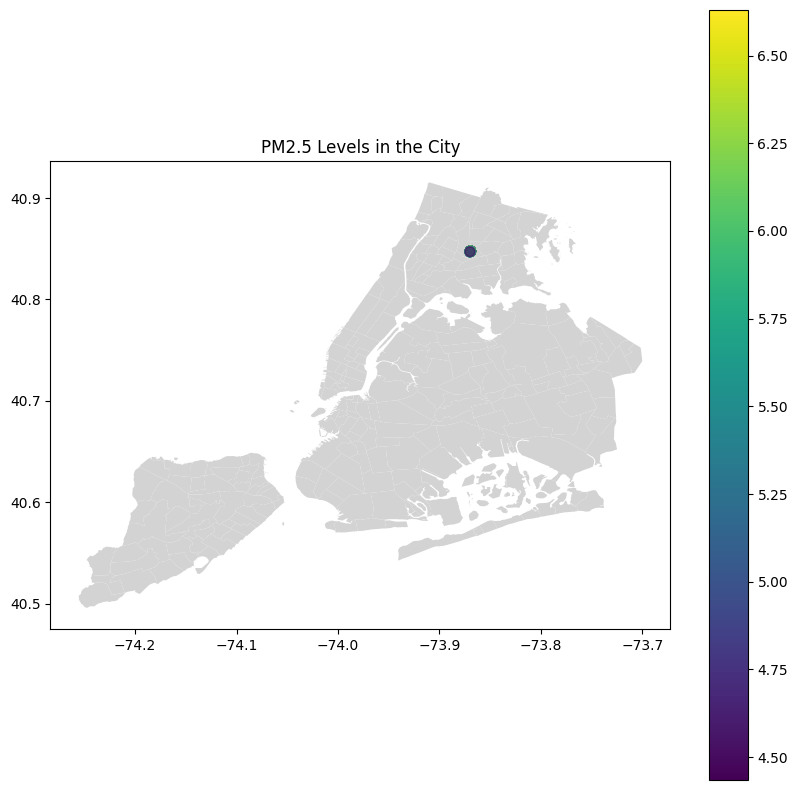

In [181]:
gdf = gpd.GeoDataFrame(test, geometry=gpd.points_from_xy(test.longitude, test.latitude))

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoJSON boundaries
GeoJsonFile.plot(ax=ax, color='lightgrey')

# Overlay PM2.5 data points
gdf.plot(ax=ax, column='pm25', cmap='viridis', legend=True, markersize=50, alpha=0.5)

plt.title('PM2.5 Levels in the City')
plt.show()

**NOTE:**

*   Locations are not unique
*   Locations are not in sequence



## VAE

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
real_pm25_data = Data_normalized.values

In [77]:
# VAE architecture
latent_dim = 3

In [75]:
batch = None
# Sampling layer
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        print(batch, dim)
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [78]:
# Encoder
encoder_inputs = keras.Input(shape=(real_pm25_data.shape[1],))
x = layers.Dense(64, activation='relu')(encoder_inputs)
x = layers.Dense(32, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Tensor("sampling_2/strided_slice:0", shape=(), dtype=int32) Tensor("sampling_2/strided_slice_1:0", shape=(), dtype=int32)
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 dense_16 (Dense)            (None, 64)                   256       ['input_8[0][0]']             
                                                                                                  
 dense_17 (Dense)            (None, 32)                   2080      ['dense_16[0][0]']            
                                                                                                  
 z_mean (Dense)              (None, 3)                    99        [

In [79]:
# Decoder
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(32, activation='relu')(latent_inputs)
x = layers.Dense(64, activation='relu')(x)
decoder_outputs = layers.Dense(real_pm25_data.shape[1], activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_18 (Dense)            (None, 32)                128       
                                                                 
 dense_19 (Dense)            (None, 64)                2112      
                                                                 
 dense_20 (Dense)            (None, 3)                 195       
                                                                 
Total params: 2435 (9.51 KB)
Trainable params: 2435 (9.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
# VAE model
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=-1, keepdims=True))
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [81]:
# Instantiating VAE model
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

# Train the VAE model
vae.fit(real_pm25_data, epochs=30, batch_size=128)


Epoch 1/30
Tensor("encoder/sampling_2/strided_slice:0", shape=(), dtype=int32) Tensor("encoder/sampling_2/strided_slice_1:0", shape=(), dtype=int32)
Z-mean:  (None, 3)
After Reconstruction
Tensor("encoder/sampling_2/strided_slice:0", shape=(), dtype=int32) Tensor("encoder/sampling_2/strided_slice_1:0", shape=(), dtype=int32)
Z-mean:  (None, 3)
After Reconstruction
1329/1329 [==============================] - 8s 4ms/step - loss: 79.4579 - reconstruction_loss: 76.4599 - kl_loss: 1.4487
Epoch 2/30
1329/1329 [==============================] - 5s 3ms/step - loss: 77.1676 - reconstruction_loss: 75.3527 - kl_loss: 1.7577
Epoch 3/30
1329/1329 [==============================] - 6s 4ms/step - loss: 77.0938 - reconstruction_loss: 75.3108 - kl_loss: 1.7654
Epoch 4/30
1329/1329 [==============================] - 4s 3ms/step - loss: 77.1052 - reconstruction_loss: 75.2614 - kl_loss: 1.7827
Epoch 5/30
1329/1329 [==============================] - 4s 3ms/step - loss: 77.0818 - reconstruction_loss: 75.22

In [82]:
# Define the number of samples you want to generate
num_samples = 100  # For example, generate 10 samples

# Sample from the latent space
latent_dim = vae.encoder.output_shape[1]
latent_samples = tf.random.normal(shape=(num_samples, latent_dim[1]))

# Decode latent vectors to generate new samples
generated_samples = vae.decoder.predict(latent_samples)


4/4 [==============================] - 0s 3ms/step


In [85]:
new_samples_denormalized = scaler.inverse_transform(generated_samples)
new_data = pd.DataFrame(new_samples_denormalized, columns=['latitude', 'longitude', 'pm25'])

In [87]:
from sklearn.metrics import mean_squared_error

true_values = Data[['latitude', 'longitude', 'pm25']].values[:100]  # Assuming first 100 rows are true values

rmse = np.sqrt(mean_squared_error(true_values[:, 2], new_samples_denormalized[:, 2]))

mape = np.mean(np.abs((true_values[:, 2] - new_samples_denormalized[:, 2]) / true_values[:, 2])) * 100

print("RMSE:", rmse)
print("MAPE:", mape)


RMSE: 2.122075864926122
MAPE: 32.142973892350405


In [88]:
new_data.to_csv("generated_data_vae.csv", index=False)

print("Generated Data via VAE:")
print(new_data.head())

Generated Data via VAE:
    latitude  longitude      pm25
0  40.812851 -73.912476  2.460877
1  40.818813 -73.892021  5.226074
2  40.811226 -73.913383  4.399001
3  40.820461 -73.890602  4.028563
4  40.810596 -73.917229  5.593777


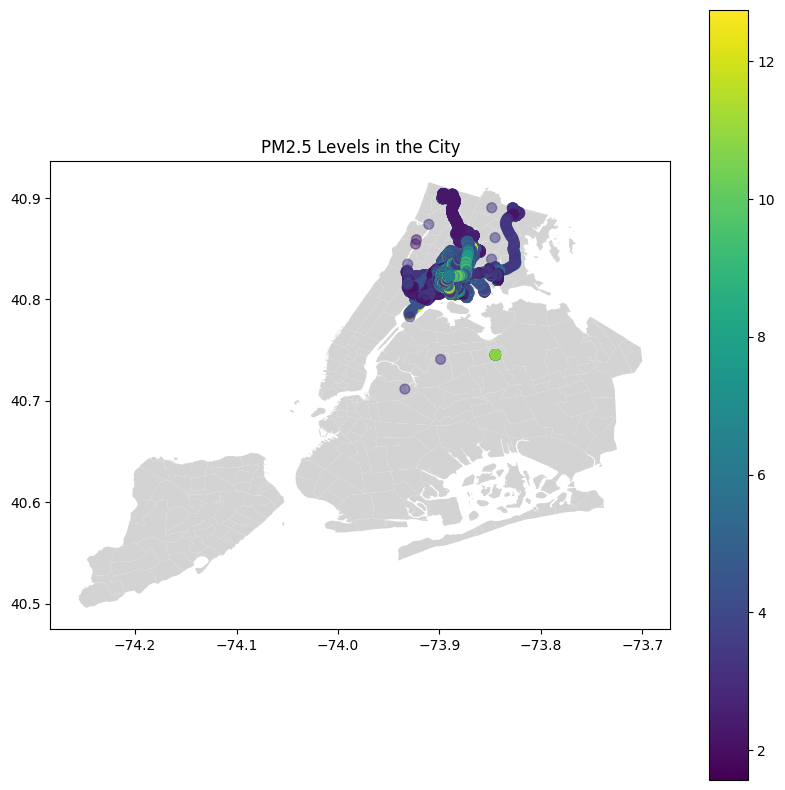

In [89]:
# Plot the GeoJSON boundaries
gdf = gpd.GeoDataFrame(Data, geometry=gpd.points_from_xy(Data.longitude, Data.latitude))

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoJSON boundaries
GeoJsonFile.plot(ax=ax, color='lightgrey')

# Overlay PM2.5 data points
gdf.plot(ax=ax, column='pm25', cmap='viridis', legend=True, markersize=50, alpha=0.5)

plt.title('PM2.5 Levels in the City')
plt.show()

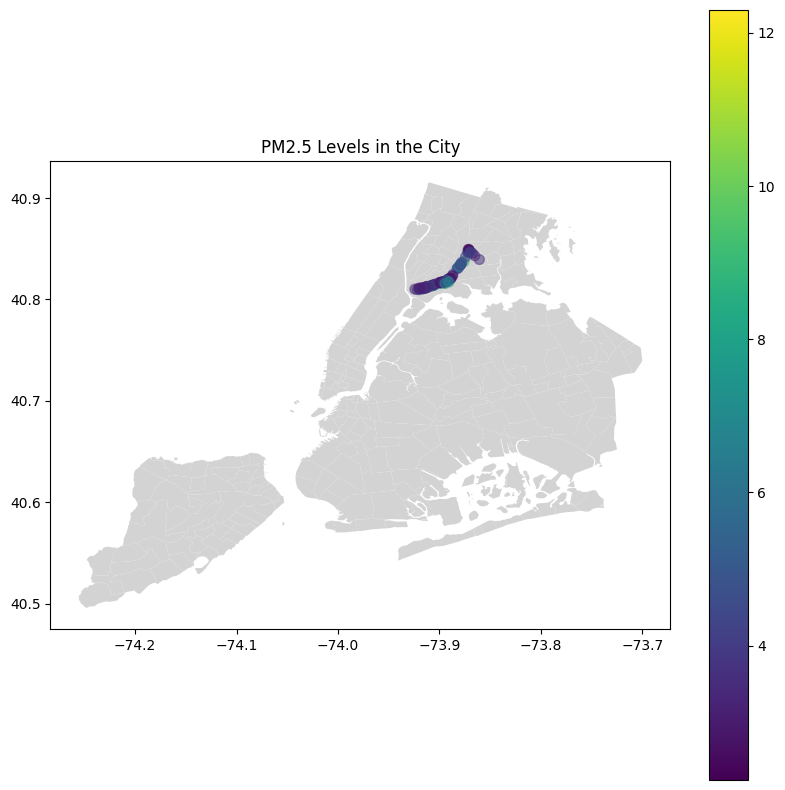

In [91]:
# Plot the GeoJSON boundaries
gdf = gpd.GeoDataFrame(new_data, geometry=gpd.points_from_xy(new_data.longitude, new_data.latitude))

fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoJSON boundaries
GeoJsonFile.plot(ax=ax, color='lightgrey')

# Overlay PM2.5 data points
gdf.plot(ax=ax, column='pm25', cmap='viridis', legend=True, markersize=50, alpha=0.5)

plt.title('PM2.5 Levels in the City')
plt.show()